In [68]:
from numpy.lib.stride_tricks import as_strided
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tqdm import tqdm
import random
import itertools
import math
import networkx

К концу семестра я решил написать функцию чтения графа
Ну ничего страшного, тяу тяу тяу тяу

In [30]:
def read_graph(filename): 
    with open(filename, 'r') as file:
        parse_nodes = {i: lambda x: int(x) for i in range(2)}
        edges = np.loadtxt(file, dtype=int, delimiter=' ', converters=parse_nodes)
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    return graph

In [2]:
file = open('D:\STUDY\ТГМ\\friends.csv', 'r')
f = open('D:\STUDY\ТГМ\list_дружба.txt', 'w')
for (i, line) in enumerate(file):
    for(j, bl) in enumerate(line[:-1].split(';')):
        if bl == '1':
            f.write(str(i) + '\t' + str(j) + '\n')
file.close()
f.close()


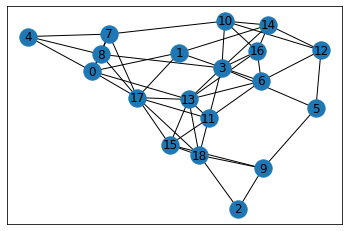

In [3]:

g = networkx.readwrite.read_edgelist(r"D:\STUDY\ТГМ\list_дружба.txt", comments='#', delimiter='\t')
networkx.drawing.nx_pylab.draw_networkx(g)
plt.show()


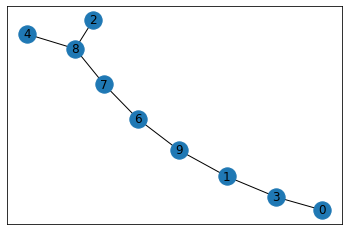

In [12]:


edjes = []
count = 10
#p=0.5*(1/count)
#p=1/count
#p=0.5*(1/count+np.log(count)/(count-1))
p=2*np.log((count)/(count-1))

for i in range(count):
   for j in range(i+1,count):
      x=random.random()
      if x < p:
         edjes.append([i,j])
         edjes.append([j,i])
g = networkx.Graph()
g.add_edges_from(edjes)
networkx.drawing.nx_pylab.draw_networkx(g)
plt.show()


In [63]:
def cluster_cof(graf):
    claster_list=networkx.clustering(graf)
    clasters=claster_list.values()
    return sum(clasters)/graf.number_of_nodes()

In [13]:



def pr(spisok):
    n = len(spisok)
    for i in range(n):
        ver = spisok[i][1]
        if not ([ver,spisok[i][0]] in spisok):
            spisok.append([ver,spisok[i][0]])
    spisok.sort()
    return spisok
            
def list_to_mat(spisok):
    all_nodes = []
    for i in range(len(spisok)):
        all_nodes.append(spisok[i][0])
    unic_nodes = list(set(all_nodes))
    n= len(unic_nodes)
    A = [[0] * n for i in range(n)]
    for i in range(len(spisok)):
        k = spisok[i][0]
        j = spisok[i][1]
        A[k][j] = 1
    return A

def to_list_from_file(filename):
    file = open(filename, 'r')
    fr=[]
    for (i, line) in enumerate(file):
        for (j, bl) in enumerate(line[:-1].split(';')):
            if bl == '1':
                fr.append([i,j])
    file.close()
    return fr

def get_list_smegn(spisok,ver):
    smegn = []
    for i in range(len(spisok)):
        if spisok[i][0] == ver:
            smegn.append(spisok[i][1])
    return smegn

def get_num_of_edjes(spisok,ver):
    count = 0
    matr = list_to_mat(spisok)
    sp = get_list_smegn(spisok,ver)
    for i in range(len(sp)):
        for j in range(len(sp)):
            if matr[sp[i]][sp[j]] == 1 and matr[sp[j]][sp[i]] == 1:
                count+=0.5
    return count
 
def node_coef(spisok,ver):
    e = get_num_of_edjes(spisok,ver)
    k = len(get_list_smegn(spisok,ver))
    if k == 1:
        return 0
    cl = 2*e/(k*(k-1))
    return cl

def coef_clust(spisok):
    coef = 0
    all_nodes = []
    for i in range(len(spisok)):
        all_nodes.append(spisok[i][0])
    unic_nodes = list(set(all_nodes))
    for i in range(len(unic_nodes)):
        cl = node_coef(spisok, unic_nodes[i])
        coef+=cl
    return coef/(len(unic_nodes))

def gen_list_graf(p, col_nodes):
    edges = []
    for i in range(col_nodes):
        for j in range(i,col_nodes):
            if np.random.rand() < p and i!=j:
                edges.append([i,j])
    return edges

#friends
# A = pr(to_list_from_file('friends.csv'))
# print('friends by hands', coef_clust(A))

# fr_graph=networkx.read_edgelist('friends.txt') 
# fr_cl=cluster_cof(fr_graph)
# print('friends by netwokx', fr_cl)

# p=np.log(19)/18
# print('p(n) = ', p)

# A = pr(gen_list_graf(p,19))
# print('random clustering for friends ',coef_clust(A))

#date_born
A = pr(to_list_from_file(r'D:\STUDY\ТГМ\births.csv'))
print('births by hands', coef_clust(A))

dr_graph=networkx.read_edgelist(r'D:\STUDY\ТГМ\births.txt') 
dr_cl=cluster_cof(dr_graph)
print('births by netwokx', dr_cl)

p=np.log(19)/18
print('p(n) = ', p)

A = pr(gen_list_graf(p,19))
print('random clustering for births ',coef_clust(A))

#random graph
#f=open('Wiki-Vote.txt','r')
#wiki = []
#for line in f:
#    wiki.append([int(line.replace('\t',' ').replace('\n','').split(' ')[0]), int(line.replace('\t',' ').replace('\n','').split(' ')[1])])
#wiki=pr(wiki)
#print('wiki-vote by hands', coef_clust(wiki))
#
#wiki_graph=networkx.read_edgelist('Wiki-Vote.txt') 
#wiki_cl=cluster_cof(wiki_graph)
#print('wiki by netwokx', wiki_cl)
#
#p=np.log(7115)/7114
#print('p(n) = ', p)
#
#A = pr(gen_list_graf(p,7115))
#print('random clustering for wiki ',coef_clust(A))

births by hands 0.37777777777777777
births by netwokx 0.37777777777777777
p(n) =  0.16357994328702447
random clustering for births  0.23170426065162908


Приблизим  вероятность нашего графа к вероятности регулярного и посчитаем его радиус - min( max( d(v,w) ) )
                                                                                        Vэv  Vэw
                                                                                       d(v,w)  - минимальный путь из v в w

Здесь я еще что-то помню поэтому расскажу
Просто
хотим построить случайный граф чтобы он был похож на социальный
хотя я и не понимаю для чего это
чтобы обманывать нейросеть?
                                                                                         

In [64]:
def probability(graph):
    edges = len(graph.edges())
    prod_edges = graph.number_of_nodes()**2
    return edges/prod_edges

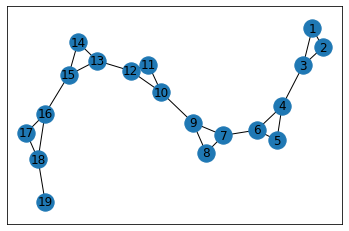

колличество ребер в ругулярном графе графе ИЗНАЧАЛЬНО  равно 24
коэфициент кластеризации регулярного графа: 0.5614035087719298
вероятность регулярного графа: 0.0664819944598338
средний радиус регулярного графа: 6
---------------------------------------------
колличество ребер в графе D:\STUDY\ТГМ\friends.txt равно 48
коэфициент кластеризации D:\STUDY\ТГМ\friends.txt графа: 0.44335839598997495
вероятность D:\STUDY\ТГМ\friends.txt графа: 0.1329639889196676
средний радиус D:\STUDY\ТГМ\friends.txt графа: 2
----------------------------------------------------
колличество ребер в ругулярном графе графе ПОСЛЕ равно 48
коэфициент кластеризации нового регулярного графа: 0.3746449456975773
вероятность нового регулярного графа: 0.1329639889196676
средний радиус нового регулярного графа: 2


In [15]:

    

def claster_cof(graph):
    claster_list = networkx.clustering(graph)
    clasters = claster_list.values()
    return sum(clasters)/graph.number_of_nodes()




filename = r'D:\STUDY\ТГМ\friends.txt'
wiki_vote_graph = networkx.read_edgelist(filename) #, comments = '#', delimiter = '\t'


count_nodes = len(wiki_vote_graph.nodes())

list_edges = []
for i in range(1, count_nodes):
    if i % 3 == 1:
        list_edges.append((i, i+1))
        list_edges.append((i, i+2))
    else:
        list_edges.append((i, i+1))


g = networkx.Graph()
g.add_edges_from(list_edges)
count_edges_rand_first = f'колличество ребер в ругулярном графе графе ИЗНАЧАЛЬНО  равно {len(g.edges())}'

networkx.drawing.nx_pylab.draw_networkx(g)
#networkx.drawing.nx_pylab.draw_networkx(wiki_vote_graph)
plt.show()

p_gr = probability(g)
p_wiki = probability(wiki_vote_graph)

count_edges_file = f'колличество ребер в графе {filename} равно {len(wiki_vote_graph.edges())}'
print(count_edges_rand_first)
print('коэфициент кластеризации регулярного графа: ' + str(claster_cof(g)))
print('вероятность регулярного графа: ' + str(p_gr))
print('средний радиус регулярного графа: ' + str(networkx.radius(g)))
print('---------------------------------------------')
print(count_edges_file)
print(f'коэфициент кластеризации {filename} графа: ' + str(claster_cof(wiki_vote_graph)))
print(f'вероятность {filename} графа: ' + str(p_wiki))
print(f'средний радиус {filename} графа: ' + str(networkx.radius(wiki_vote_graph)))
print('----------------------------------------------------')




while p_wiki > p_gr:
    n1 = random.randint(1, count_nodes)
    n2 = random.randint(1, count_nodes)
    n = [n1, n2]
    g.add_edge(n1, n2)
    p_gr = probability(g)

#networkx.drawing.nx_pylab.draw_networkx(g)
count_edges_rand_second = f'колличество ребер в ругулярном графе графе ПОСЛЕ равно {len(g.edges())}'
print(count_edges_rand_second)
print('коэфициент кластеризации нового регулярного графа: ' + str(claster_cof(g)))
print('вероятность нового регулярного графа: ' + str(p_gr))
print('средний радиус нового регулярного графа: ' + str(networkx.radius(g)))








Хотим считать радиусы для любых графов
Это сложно! для wiki-wote радиус считается примерно 30 минут
Поэтому хотим научиться оценивать радиус

In [70]:
def get_radius(graph):
    def get_alpha(graph, param):
        # результат сильно зависит от размера выборки(param)
        # с увеличением param уменьшается радиус, со значения param = 0.01 стабилизируется значение radius
        sample_size = round(len(graph.nodes()) * param)
        sample_nodes = [np.random.choice(graph.nodes) for i in range(sample_size)]
        neighbors_edge = list(set([v for node in sample_nodes for v in list(graph.neighbors(node))]) - set(sample_nodes))
        alpha = len(neighbors_edge) / sample_size
        return alpha

    def expanded_param(graph, param=0.1, sample_num=10):
        # сколько нужно выборок
        sample_size = round(len(graph.nodes()) * param)
        alpha = min([get_alpha(graph, param) for i in range(sample_num)])
        r = math.log(c * (alpha - 1) / sample_size + 1, alpha)
        return r

    def average(graph, param):
        sample_size = round(len(graph.nodes()) * param)
        sample_nodes = [np.random.choice(graph.nodes) for i in range(sample_size)]
        neighbors_edge = [v for node in sample_nodes for v in list(graph.neighbors(node))]
        alpha = len(neighbors_edge) / sample_size
        return alpha

    def average_param(graph, param=0.1):
        sample_size = round(len(graph.nodes()) * param)
        alpha = average(graph, param)
        r = math.log(c * (alpha - 1) / sample_size + 1, alpha)
        return r
    c = len(graph.nodes())
    
    return average_param(graph),expanded_param(graph)


In [60]:
with open('D:\STUDY\ТГМ\\births.txt', 'r') as file:
    parse_nodes = {i: lambda x: int(x) for i in range(2)}
    edges = np.loadtxt(file, dtype=int, delimiter=' ', converters=parse_nodes)

graph = nx.DiGraph()
graph.add_edges_from(edges)

def get_alpha(graph, param):
    # результат сильно зависит от размера выборки(param)
    # с увеличением param уменьшается радиус, со значения param = 0.01 стабилизируется значение radius
    sample_size = round(len(graph.nodes()) * param)
    sample_nodes = [np.random.choice(graph.nodes) for i in range(sample_size)]
    neighbors_edge = list(set([v for node in sample_nodes for v in list(graph.neighbors(node))]) - set(sample_nodes))
    alpha = len(neighbors_edge) / sample_size
    return alpha

def expanded_param(graph, param=0.1, sample_num=10):
    # сколько нужно выборок
    sample_size = round(len(graph.nodes()) * param)
    alpha = min([get_alpha(graph, param) for i in range(sample_num)])
    r = math.log(len(graph.nodes()) * (alpha - 1) / sample_size + 1, alpha)
    return r

def average(graph, param):
    sample_size = round(len(graph.nodes()) * param)
    sample_nodes = [np.random.choice(graph.nodes) for i in range(sample_size)]
    neighbors_edge = [v for node in sample_nodes for v in list(graph.neighbors(node))]
    alpha = len(neighbors_edge) / sample_size
    return alpha

def average_param(graph, param=0.1):
    sample_size = round(len(graph.nodes()) * param)
    alpha = average(graph, param)
    r = math.log(len(graph.nodes()) * (alpha - 1) / sample_size + 1, alpha)
    return r


print(f'Radius by average: {average_param(graph)}')
print(f'Radius by expanded: {expanded_param(graph)}')

Radius by average: 2.561398739993617
Radius by expanded: 3.3923174227787602


In [54]:
with open('D:\STUDY\ТГМ\\births.txt', 'r') as file:
    parse_nodes = {i: lambda x: int(x) for i in range(2)}
    edges = np.loadtxt(file, dtype=int, delimiter=' ', converters=parse_nodes)

In [37]:

graph = nx.Graph()
graph.add_edges_from(edges)

In [62]:
get_radius(graph)

[0, 7, 8, 10, 12]
[17, 11, 13, 14]
[1, 3, 5, 10, 16]
[17, 3, 4, 14]
[0, 5, 7, 11, 14, 15, 17, 18]
[0, 3, 4, 7, 10, 13, 14, 17]
[1, 11, 12, 13, 16]
[16, 1, 10, 3]
[0, 3, 4, 6, 10, 11, 14, 17, 18]
[2, 11, 13, 14, 17]
[0, 5, 7, 8, 18]


(2.9734880079826222, 3.3923174227787602)

Итак. 
Начнем
Идейная задача: хотим взять пользователя вконтакте и найти его в инстаграмме
тоесть хотим взять например граф вк и инсты 
имеем допустим друга искомого человека в вк и инсте
возьмем всех друзей друга и хотим построить вектора 
по этим векторам сможем определить схожесть
Как строить вектора?
Разложим граф на базисные подграфы 
Возьмем точку (человека) и посмотрим в скольких базисах он состоит это и будет наш вектор
Строим подграфы друга и ищем похожие элементы

Идейная задача номер 2: хотим анализировать два сообщества 
например успешное и не очень 
Что нужно сделать чтобы одно приблизилось ко второму
Как создать похожую структуру?
Какой важный паттерн нужно выделить из графа?
Для этого есть метод и я не знаю как он называется но пусть это останется в тайне
Итак алгоритм
Собирем все вершины искомого графа(сообщества) и оставляем только половину ребер в каждой вершине
Далее случайным образом соединяем вершины(для каждой вершины есть входящая и исходящая вершина)
В итоге построим какой-то граф
посчитаем базисы
Берем точки и строим вектора и сравниваем их с исходными получаем где-то выброс(это и будем важный паттерн)
Я понял что я половину не понял
например какие-то там соц сети берем друга смотрим его друзей найдем вектора 
ааааа
все я понял
объясняю
строим для каждого друга друга исходного человека вектора в двух соц сетях
и далее берем вектор нужного нам человека и ищем похожий вектор в другой соцсети
ничего страшного тяу тяу тяу тяу....


In [2]:
or_graph = nx.DiGraph()
# or_graph = nx.generators.directed.random_k_out_graph(5, 2,1)

In [218]:
or_graph.add_edge(0,1)
or_graph.add_edge(0,3)
or_graph.add_edge(2,0)
or_graph.add_edge(1,2)
or_graph.add_edge(3,2)


or_graph.add_edge(3,0)
or_graph.add_edge(1,4)
or_graph.add_edge(2,3)
or_graph.add_edge(3,4)
# or_graph.add_edge(1,0)
# or_graph.add_edge(1,2)
# or_graph.add_edge(2,1)
# or_graph.add_edge(3,1)
# or_graph.add_edge(4,5)
# or_graph.add_edge(4,3)
# or_graph.add_edge(2,0)
# or_graph.add_edge(7,2)
# or_graph.add_edge(6,7)
# or_graph.add_edge(7,6)


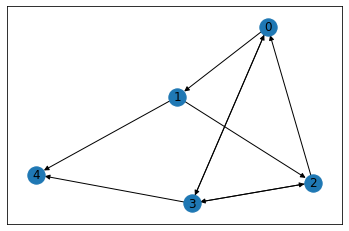

In [219]:
nx.drawing.nx_pylab.draw_networkx(or_graph)

In [140]:
nx.adjacency_matrix(or_graph).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

0:37 Алина вытаскивает меня из-за компьютера поэтому пора уходить
Что я придумал
Нужно создать кастомную матрицу смежности которая показывает что если вершина является хвостом то дай ей значение 1 если головой то -1!

In [3]:
def get_edges_nodes(or_graph):
    list_edges = []
    list_nodes = []

    for item in or_graph.edges:
        list_edges.append(item)

    for item in or_graph.nodes:
        list_nodes.append(item) 
    return list_edges,list_nodes

In [4]:
def get_matrix(edges_list):
    new_graph = nx.DiGraph()
    new_graph.add_edges_from(edges_list)
    matrix = nx.adjacency_matrix(new_graph).toarray()
    return matrix

In [5]:
a = [[0, 1],
     [1, 0]]

b = [[0, 1],
     [0, 0]]

c = [[0, 1, 0],
     [0, 0, 1],
     [0, 0, 0]]

d = [[0, 1, 0],
     [1, 0, 1],
     [0, 0, 0]]

e = [[0, 1, 0],
     [0, 0, 0],
     [0, 1, 0]]

f = [[0, 0, 0],
     [1, 0, 1],
     [0, 0, 0]]

g = [[0, 1, 0],
     [1, 0, 1],
     [0, 1, 0]]

h = [[0, 1, 0],
     [1, 0, 0],
     [0, 1, 0]]

i = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

j = [[0, 0, 0],
     [1, 0, 1],
     [1, 0, 0]]

k = [[0, 1, 1],
     [1, 0, 1],
     [1, 1, 0]]

l = [[0, 0, 1],
     [1, 0, 1],
     [1, 0, 0]]

m = [[0, 1, 1],
     [0, 0, 0],
     [1, 1, 0]]

n = [[0, 0, 1],
     [1, 0, 1],
     [1, 1, 0]]

In [6]:
matrix_keys = [a, b, c, d, e, f, g, h, i, j, k, l, m, n]

In [7]:
def get_matrix_value(matrix,matrix_values):
    for item in matrix_keys:
        if np.array_equal(matrix, item):
            index = matrix_keys.index(item)
            matrix_values[index] += 1

In [85]:
def graph_to_vector(G):
    matrix_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#     Собираем вершины и ребра
    list_edges,list_nodes = get_edges_nodes(G)   
#     Строим сочетания для 2х вершин
#     nodes_nodes = []
#     for i in range(len(list_nodes)):
#         for j in range(i+1, len(list_nodes)):
#             nodes_nodes.append((list_nodes[i],list_nodes[j]))
    list_two_node = []
    for item in itertools.combinations(list_nodes, 2):
        temp = []
        for jtem in list_edges:
            if item[0] in jtem and item[1] in jtem:
                temp.append(jtem)
        if temp:
            list_two_node.append(temp)
#     Ходим по сочетаниям и строим списки ребер
#     list_two_node = []
#     for item in nodes_nodes:
#         temp = []
#         for jtem in list_edges:
#             if item[0] in jtem and item[1] in jtem:
#                 temp.append(jtem)
#         if temp:
#             list_two_node.append(temp)
            
    list_three_edges = []
    for item in itertools.combinations(list_nodes, 3):
        temp = []
        for jtem in list_edges:
            if (item[0] in jtem and item[1] in jtem) or (item[0] in jtem and item[2] in jtem)\
            or (item[1] in jtem and item[2] in jtem) :
                temp.append(jtem)
        if temp:
            list_three_edges.append(temp)  
#     for item in list_two_node:
#         if item  in list_three_edges:
#             pass
#         else:
#             list_three_edges.append(item)
        
        
#     Генерим сочетания для 3х вершин
#     list_three_node = []
#     for item in itertools.combinations(list_nodes, 3):
#         list_three_node.append(item)
        
# #      Ходим по сочетаниям и строим списки ребер   
#     list_three_edges = []
#     for item in list_three_node:
#         temp = []
#         for jtem in list_edges:
#             if (item[0] in jtem and item[1] in jtem) or (item[0] in jtem and item[2] in jtem)\
#             or (item[1] in jtem and item[2] in jtem) :
#                 temp.append(jtem)
#         if temp:
#             list_three_edges.append(temp)  
#     Список из двух + список из трех
#     list_three_edges += list_two_node

#     Убираем дубликаты
    for i in tqdm(range(len(list_three_edges))):
        for j in range(len(list_three_edges)):
            if i != j:
                if list_three_edges[i] == list_three_edges[j]:
                    list_three_edges[j] = -1
    list_three_edges_true = []
    for item in list_three_edges:
        if item != -1:
            list_three_edges_true.append(item)
    
#     Строим матрицу смежности для каждого списка и добавляем значения в вектор
    for edges_list in list_three_edges_true:
        matrix = get_matrix(edges_list)
        get_matrix_value(matrix,matrix_values)
    
    return matrix_values

In [9]:
def point_to_vec(point,gr):
    list_edges,list_nodes = get_edges_nodes(or_graph)
    point_edges = []
    for edge in list_edges:
        if point in edge:
            point_edges.append(edge)
    new_graph = nx.DiGraph()
    new_graph.add_edges_from(point_edges)
    vec = graph_to_vector(new_graph)
    return vec

Задача
Хотим нагенерить случайных графов (удалив половину ребер) построить по ним вектора и сравнить их с основными

In [10]:
def get_in_out(gr):
    list_edges, list_nodes = get_edges_nodes(gr)
    dict_nodes = {}
    for node in list_nodes:
        index_in = 0
        index_out = 0
        for edge in list_edges:
            if node == edge[0]:
                index_out += 1
            elif node == edge[1]:
                index_in += 1
        dict_nodes[node] = (index_out,index_in)
    return dict_nodes

In [11]:
def get_delete_edges(list_edges):
#     Определяем колличество удаляемых ребер
    if len(list_edges) % 2 == 0:
        count_random = int(len(list_edges) / 2)
    else:
        count_random = int(len(list_edges) / 2) + 1
    
#     Создаем все сочетания вариантов удаления ребер
    rand_numb_edges = []
    guesses = list(range(len(list_edges)))
    random.shuffle(guesses)
                   
    while len(rand_numb_edges) != count_random:
        rand_numb_edges.append(guesses.pop())
#     print(rand_numb_edges)
    
#     Выбираем ребра для удаления
    delete_edges = []
    for index in rand_numb_edges:
        edge = list_edges[index]
        delete_edges.append(edge)
    
    return delete_edges

In [12]:
def get_other_edges(list_edges,delete_edges):
    temp = []
    for item in list_edges:
        for jtem in delete_edges:
            if item not in delete_edges:
                temp.append(item)
    
    for i in range(len(temp)):
        for j in range(len(temp)):
            if i != j :
                if temp[i] == temp[j]:
                    temp[j] = None
    
    other_edges = []
    for item in temp:
        if item != None:
            other_edges.append(item)
    
    return other_edges

In [13]:
def get_random_edges(delete_edges):
    
    del_graph = nx.DiGraph()
    del_graph.add_edges_from(delete_edges)
    
    dict_del = get_in_out(del_graph)
    
    append_edges = []
    for item in dict_del.items():
        node = item[0]
        copy_dict = dict_del.copy()
        tuple_node = dict_del[node]
        left_node = node
        count_out = item[1][0]
        if count_out != 0:
            del copy_dict[node]
            temp = []
            for other_item in copy_dict.items():
                other_node = other_item[0]
                count_in = other_item[1][1]
                if count_in != 0:
                    temp.append(other_node)
            if temp:
                rand_index = get_rand_index(temp)
                right_node = temp[rand_index]
                append_edge = (left_node,right_node)
                append_edges.append(append_edge)

                left_tuple = dict_del[left_node]
                right_tuple = dict_del[right_node]
                new_left_tuple = (left_tuple[0] - 1,left_tuple[1])
                new_right_tuple = (right_tuple[0], right_tuple[1] -1)
                dict_del[left_node] = new_left_tuple
                dict_del[right_node] = new_right_tuple
    
    return append_edges
    

In [14]:
def get_rand_index(lst):
    count_elem = len(lst)
    if count_elem == 1:
        rand_index = 0
    else:
        rand_index = random.randint(0,count_elem-1)
    return rand_index

In [15]:
def get_rand_graph_vec(gr):
    list_edges,list_nodes = get_edges_nodes(gr)
    delete_edges = get_delete_edges(list_edges)
    random_edges = get_random_edges(delete_edges)
    other_edges = get_other_edges(list_edges,delete_edges)
    new_list_edges = random_edges + other_edges
    new_graph = nx.DiGraph()
    new_graph.add_edges_from(new_list_edges)
    vec = graph_to_vector(new_graph)
    
    return vec


In [16]:
friends_graph = read_graph(r'D:\STUDY\ТГМ\friends.txt')
births_graph = read_graph(r'D:\STUDY\ТГМ\births.txt')

In [74]:
friend_vec = graph_to_vector(friends_graph)
norm_friend_vec = friend_vec / np.linalg.norm(friend_vec,2)
print(friend_vec)
print(norm_friend_vec)

100%|█████████████████████████████████████████████████████████████████████████████| 677/677 [00:00<00:00, 10600.69it/s]

[26, 22, 4, 14, 10, 0, 23, 14, 0, 0, 7, 0, 1, 0]
[0.54849391 0.46411023 0.08438368 0.29534288 0.2109592  0.
 0.48520615 0.29534288 0.         0.         0.14767144 0.
 0.02109592 0.        ]


In [86]:
birth_vec = graph_to_vector(births_graph)
norm_birth_vec = birth_vec /np.linalg.norm(birth_vec,2)
print(birth_vec)
print(norm_birth_vec)


100%|█████████████████████████████████████████████████████████████████████████████| 619/619 [00:00<00:00, 12412.68it/s]

[20, 29, 7, 22, 17, 0, 12, 15, 0, 0, 6, 0, 2, 0]
[0.40225899 0.58327554 0.14079065 0.44248489 0.34192014 0.
 0.2413554  0.30169425 0.         0.         0.1206777  0.
 0.0402259  0.        ]


In [75]:
def get_all_info(filename):
    name = filename.split('\\')[-1]
    graph = read_graph(filename)
    cluster_coef = cluster_cof(graph)
    prob = probability(graph)
    radius = get_radius(graph)
    vec = graph_to_vector(graph)
    print(f'Граф:{name}')
    print(f'Коэфициент кластеризации:{cluster_coef}')
    print(f'Вероятность:{prob}')
    print(f'(Радиус через среднее, Радиус через расширение):{radius}')
    print(f'Базисный вектор:{vec}')
    
    

In [76]:
get_all_info(r'D:\STUDY\ТГМ\births.txt')

100%|█████████████████████████████████████████████████████████████████████████████| 668/668 [00:00<00:00, 10974.09it/s]

Граф:births
Коэфициент кластеризации:0.2994678654114289
Вероятность:0.19113573407202217
(Радиус через среднее, Радиус через расширение):(2.561398739993617, 3.3923174227787602)
Базисный вектор:[20, 29, 7, 22, 17, 0, 12, 15, 0, 0, 6, 0, 2, 0]


In [19]:
matrix_vec_norm = [get_rand_graph_vec(friends_graph)/np.linalg.norm(get_rand_graph_vec(friends_graph),2) for i in tqdm(range(10))]

100%|█████████████████████████████████████████████████████████████████████████████| 632/632 [00:00<00:00, 11225.26it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 612/612 [00:00<00:00, 10261.83it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 634/634 [00:00<00:00, 9967.05it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 629/629 [00:00<00:00, 9520.06it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 653/653 [00:00<00:00, 9841.47it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 618/618 [00:00<00:00, 13175.02it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 634/634 [00:00<00:00, 9367.53it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 580/580 [00:00<00:00, 11971.93it/s]

100%|███████████████████████████

In [28]:
matrix_vec = [get_rand_graph_vec(friends_graph) for i in tqdm(range(10))]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.43it/s]


In [29]:
matrix_vec

[[11, 33, 26, 10, 20, 0, 5, 12, 1, 0, 1, 0, 0, 0],
 [7, 39, 33, 1, 30, 0, 1, 4, 3, 0, 0, 0, 1, 0],
 [7, 38, 20, 4, 28, 0, 0, 5, 6, 0, 0, 0, 0, 0],
 [7, 39, 26, 2, 30, 0, 4, 8, 4, 0, 0, 0, 2, 0],
 [11, 29, 16, 12, 21, 0, 8, 10, 0, 0, 0, 0, 0, 0],
 [11, 30, 14, 11, 18, 0, 3, 9, 1, 0, 0, 0, 0, 0],
 [10, 31, 14, 10, 20, 0, 5, 10, 2, 0, 0, 0, 1, 0],
 [10, 33, 20, 16, 19, 0, 5, 17, 2, 0, 0, 0, 0, 0],
 [8, 39, 26, 6, 26, 0, 3, 8, 3, 0, 0, 0, 0, 0],
 [10, 32, 13, 7, 29, 0, 2, 5, 3, 0, 0, 0, 1, 0]]

In [34]:
np.mean(matrix_vec_norm,axis = 0)

array([0.15692156, 0.70603289, 0.46196886, 0.16939105, 0.51623965,
       0.        , 0.0584573 , 0.15269426, 0.04883469, 0.        ,
       0.00206813, 0.        , 0.00987269, 0.        ])

array([2.47034590e-02, 2.83753782e-01, 5.73671182e-02, 1.21126199e-01,
       1.04190814e-01, 0.00000000e+00, 1.59864951e-02, 4.56076927e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.79699439e-04, 0.00000000e+00])

In [26]:
np.mean(matrix_vec_norm,axis = 0) *  np.var(matrix_vec_norm,axis = 0)

array([1.54460262e-04, 8.43069132e-03, 5.67979869e-03, 1.66159528e-03,
       4.15852653e-03, 0.00000000e+00, 3.75033353e-05, 4.68163997e-04,
       1.67839827e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.57649000e-06, 0.00000000e+00])

In [36]:
abs(norm_birth_vec - np.mean(matrix_vec_norm,axis = 0))

array([0.24533744, 0.12275735, 0.32117821, 0.27309384, 0.1743195 ,
       0.        , 0.1828981 , 0.14899999, 0.04883469, 0.        ,
       0.11860957, 0.        , 0.03035321, 0.        ])

In [37]:
abs(norm_friend_vec - np.mean(matrix_vec_norm,axis = 0))

array([0.39157236, 0.24192266, 0.37758518, 0.12595182, 0.30528045,
       0.        , 0.42674886, 0.14264862, 0.04883469, 0.        ,
       0.14560331, 0.        , 0.01122323, 0.        ])

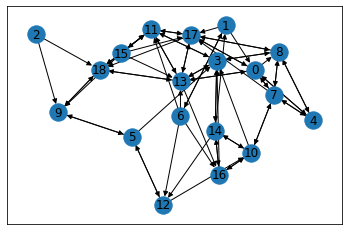

In [259]:
nx.drawing.nx_pylab.draw_networkx(friends_graph)


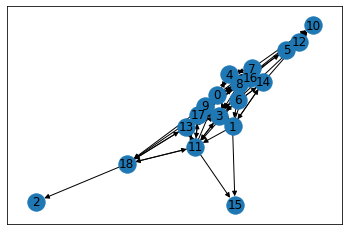

In [260]:
nx.drawing.nx_pylab.draw_networkx(births_graph)

In [77]:
g79 = nx.read_edgelist('group79members_friends.graph')

In [87]:
g79_vec = graph_to_vector(g79)
print(g79_vec)


100%|███████████████████████████████████████████████████████████████████████████| 56580/56580 [06:49<00:00, 138.06it/s]

[0, 238, 557, 0, 160, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [51]:
matrix_vec_norm = get_rand_graph_vec(g79)
print(matrix_vec_norm)

100%|███████████████████████████████████████████████████████████████████████████| 42800/42800 [03:39<00:00, 194.78it/s]


[0, 191, 43, 0, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0]
